In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Error handling for data loading &  Loading the dataset
try:
    # Load dataset
    Bike_sharing_data = pd.read_csv("/content/drive/MyDrive/day.csv")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    # Terminate the script if data cannot be loaded
    raise SystemExit("Script cannot continue without data.")

In [ ]:
# Renaming columns for clarity
Bike_sharing_data.rename(columns={'instant':'rec_id', 'dteday':'datetime', 'yr':'year', 'mnth':'month',
                   'weathersit':'weather_condition', 'hum':'humidity', 'cnt':'total_count'}, inplace=True)

In [ ]:
# Display the first few rows to understand what the data looks like
print(Bike_sharing_data.head())




   rec_id    datetime  season  year  month  holiday  weekday  workingday  \
0       1  2011-01-01       1     0      1        0        6           0   
1       2  2011-01-02       1     0      1        0        0           0   
2       3  2011-01-03       1     0      1        0        1           1   
3       4  2011-01-04       1     0      1        0        2           1   
4       5  2011-01-05       1     0      1        0        3           1   

   weather_condition      temp     atemp  humidity  windspeed  casual  \
0                  2  0.344167  0.363625  0.805833   0.160446     331   
1                  2  0.363478  0.353739  0.696087   0.248539     131   
2                  1  0.196364  0.189405  0.437273   0.248309     120   
3                  1  0.200000  0.212122  0.590435   0.160296     108   
4                  1  0.226957  0.229270  0.436957   0.186900      82   

   registered  total_count  
0         654          985  
1         670          801  
2        1229    

In [ ]:
# Print data structure and statistical summary
print(Bike_sharing_data.info())
print(Bike_sharing_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rec_id             731 non-null    int64  
 1   datetime           731 non-null    object 
 2   season             731 non-null    int64  
 3   year               731 non-null    int64  
 4   month              731 non-null    int64  
 5   holiday            731 non-null    int64  
 6   weekday            731 non-null    int64  
 7   workingday         731 non-null    int64  
 8   weather_condition  731 non-null    int64  
 9   temp               731 non-null    float64
 10  atemp              731 non-null    float64
 11  humidity           731 non-null    float64
 12  windspeed          731 non-null    float64
 13  casual             731 non-null    int64  
 14  registered         731 non-null    int64  
 15  total_count        731 non-null    int64  
dtypes: float64(4), int64(11), 

In [ ]:
# Convert 'dteday' to datetime format to extract date features
Bike_sharing_data['datetime'] = pd.to_datetime(Bike_sharing_data['datetime'])
Bike_sharing_data['day'] = Bike_sharing_data['datetime'].dt.day

In [ ]:
# Remove unnecessary columns like 'instant' (just an index) and 'dteday' after extracting date information
processed_data = Bike_sharing_data.drop(['rec_id', 'datetime'], axis=1)


In [ ]:
# Check for missing values in the dataset
missing_values = processed_data.isnull().sum()
print(missing_values)

season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
day                  0
dtype: int64


In [ ]:
# Handle missing values if any
if missing_values.any():
    processed_data = processed_data.fillna(processed_data.mean())
    print("Missing values handled.")


In [ ]:
# Splitting the dataset into features (X) and the target variable (y)
X = processed_data.drop('total_count', axis=1)
y = processed_data['total_count']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#  Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
# Advanced feature engineering:Applying polynomial features for more complex relationships in data
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


In [ ]:
#  Hyperparameter tuning using GridSearchCV for Ridge Regression
# We are using Ridge Regression, which is a regularized version of Linear Regression.
# It adds a regularization term to the cost function, helping to prevent overfitting by shrinking large coefficients.
param_grid = {'alpha': [0.1, 1, 10, 100]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_poly, y_train)

#  Output the best hyperparameter value found and the corresponding score
print("Best hyperparameter (alpha) found:", grid_search.best_params_)

# Use the best model found by GridSearchCV
best_ridge_model = grid_search.best_estimator_

# Predict and evaluate using advanced metrics
y_pred_ridge = best_ridge_model.predict(X_test_poly)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)  # Make sure this line is present

#  Print the advanced performance metrics for the best Ridge Regression model
print("Best Ridge Regression MSE:", mse_ridge)
print("Best Ridge Regression R² Score:", r2_ridge)
print(f"Ridge Regression MAE: {mae_ridge}")


Best hyperparameter (alpha) found: {'alpha': 0.1}
Best Ridge Regression MSE: 5.420630173310276
Best Ridge Regression R² Score: 0.9999986481822201
Ridge Regression MAE: 1.453155383502535


In [ ]:
# Random Forest Regressor
# The Random Forest is an ensemble method that creates multiple decision trees and merges their predictions.
# It is robust to overfitting and can handle non-linear relationships. 'n_estimators' defines the number of trees.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluate the model's performance with additional metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Print the performance metrics for Random Forest Regression
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R² Score: {r2_rf}")
print(f"Random Forest MAE: {mae_rf}")

Random Forest MSE: 11136.07122312925
Random Forest R² Score: 0.9972228433600571
Random Forest MAE: 66.81646258503399


In [ ]:
# Error handling for model training
try:
    # Hyperparameter tuning for Ridge Regression
    param_grid = {'alpha': [0.1, 1, 10, 100]}
    ridge = Ridge()
    grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
except Exception as e:
    print(f"An error occurred during model training: {e}")
    raise

# Model training: Ridge Regression
ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_poly, y_train)
best_ridge = grid_search.best_estimator_

In [ ]:
X_test_poly = poly.transform(X_test_scaled)

# Advanced Model Evaluation: Adjusted R² and Residual Plot
best_ridge_model = grid_search.best_estimator_
y_pred = best_ridge_model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Calculate Adjusted R²
p = X_train_poly.shape[1]
n = X_test.shape[0]
adjusted_r2 = 1 - (1-r2) * (n-1) / (n-p-1)
print(f"Adjusted R²: {adjusted_r2}")

Adjusted R²: 0.9999926901705233


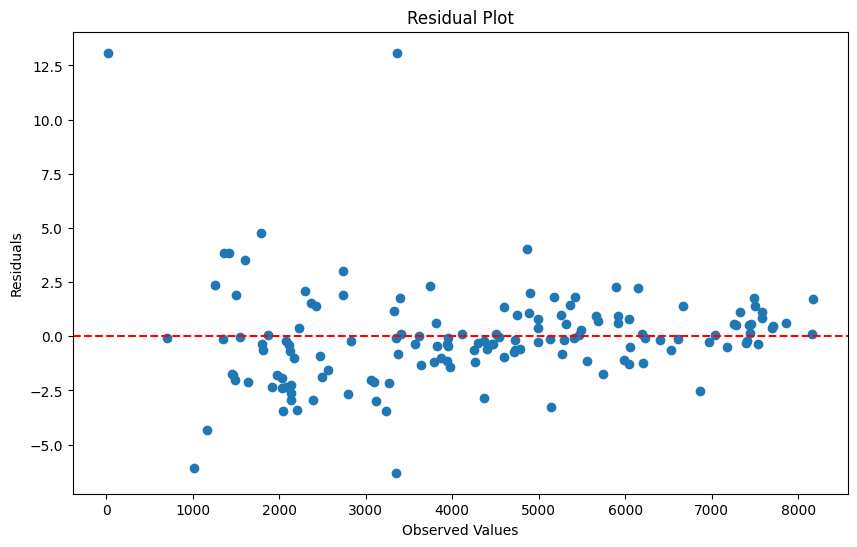

In [ ]:
# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

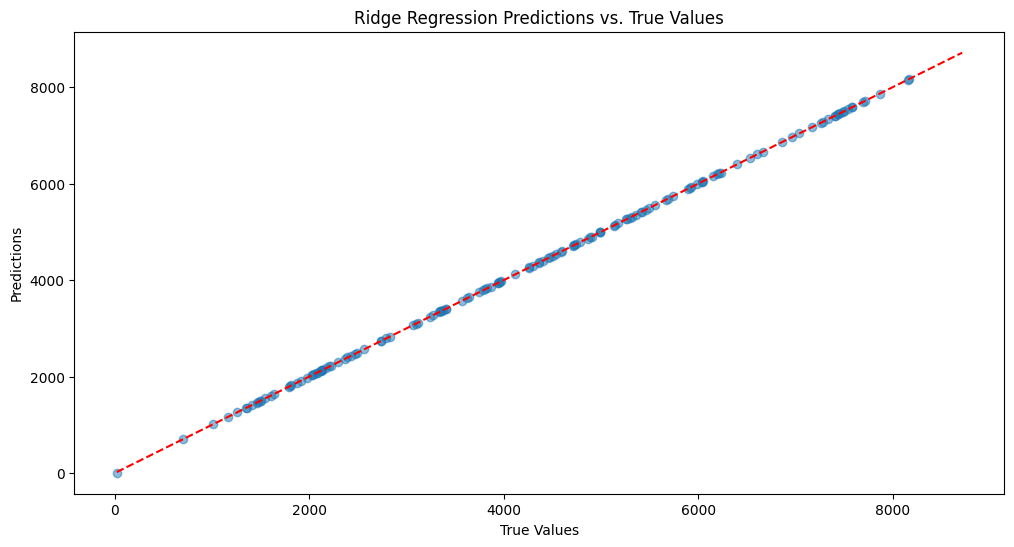

In [ ]:

# Prediction and evaluation
predictions = best_ridge.predict(X_test_poly)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Ridge Regression Predictions vs. True Values')
plt.show()

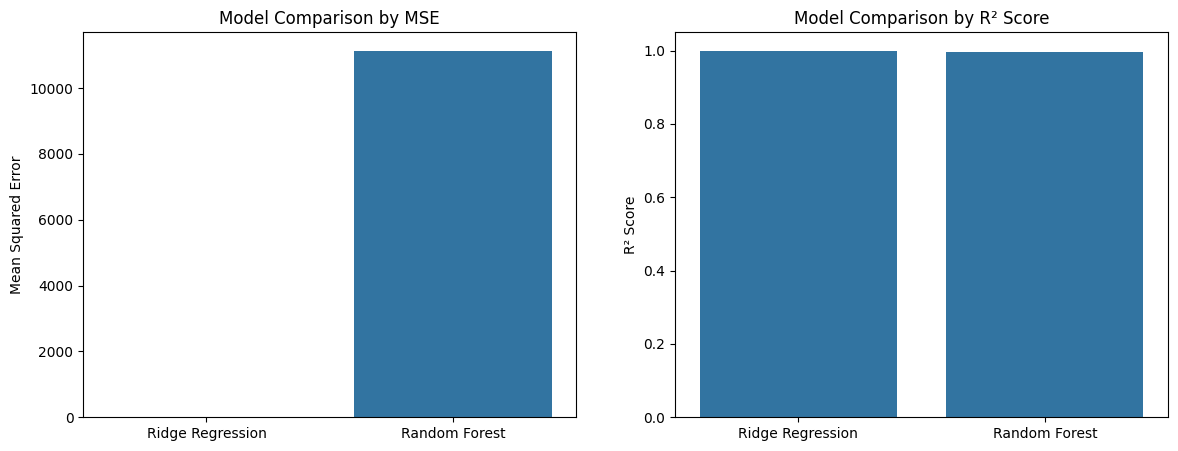

In [ ]:


# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_predictions = rf.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Comparing models
models = ['Ridge Regression', 'Random Forest']
mse_values = [mse, rf_mse]
r2_values = [r2, rf_r2]

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(ax=ax[0], x=models, y=mse_values)
ax[0].set_title('Model Comparison by MSE')
ax[0].set_ylabel('Mean Squared Error')

sns.barplot(ax=ax[1], x=models, y=r2_values)
ax[1].set_title('Model Comparison by R² Score')
ax[1].set_ylabel('R² Score')
plt.show()

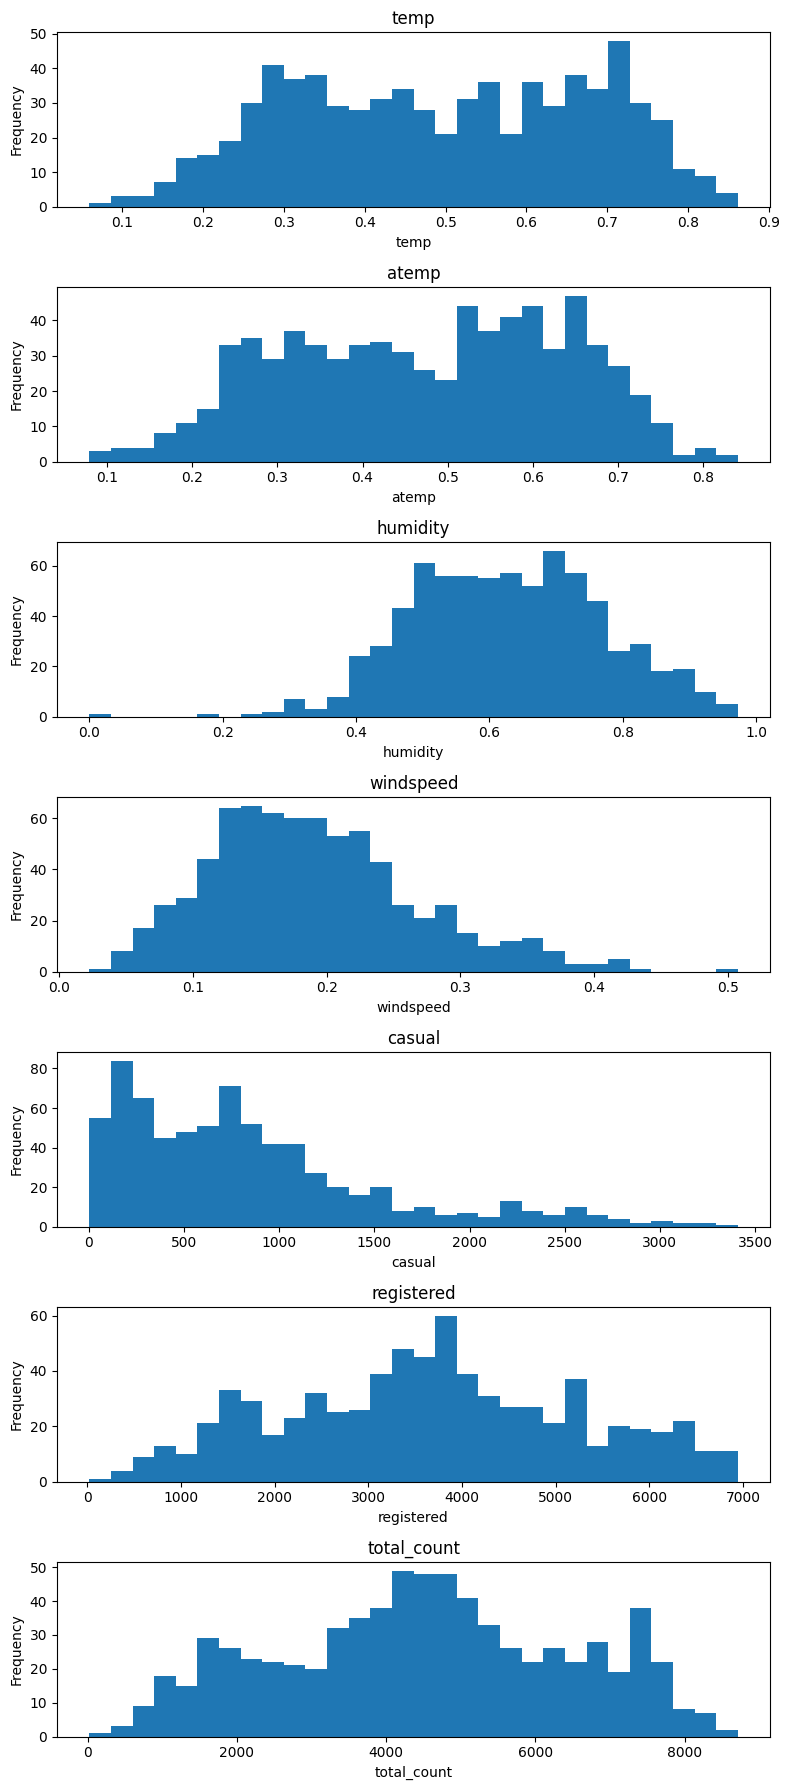

In [ ]:
# Univariate analysis: Visualizing distributions of numeric features using histograms
numeric_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'total_count']
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(8, 18))
for i, col in enumerate(numeric_cols):
    Bike_sharing_data[col].plot(kind='hist', bins=30, ax=axes[i], title=col)
    axes[i].set_xlabel(col)
plt.tight_layout()
plt.show()


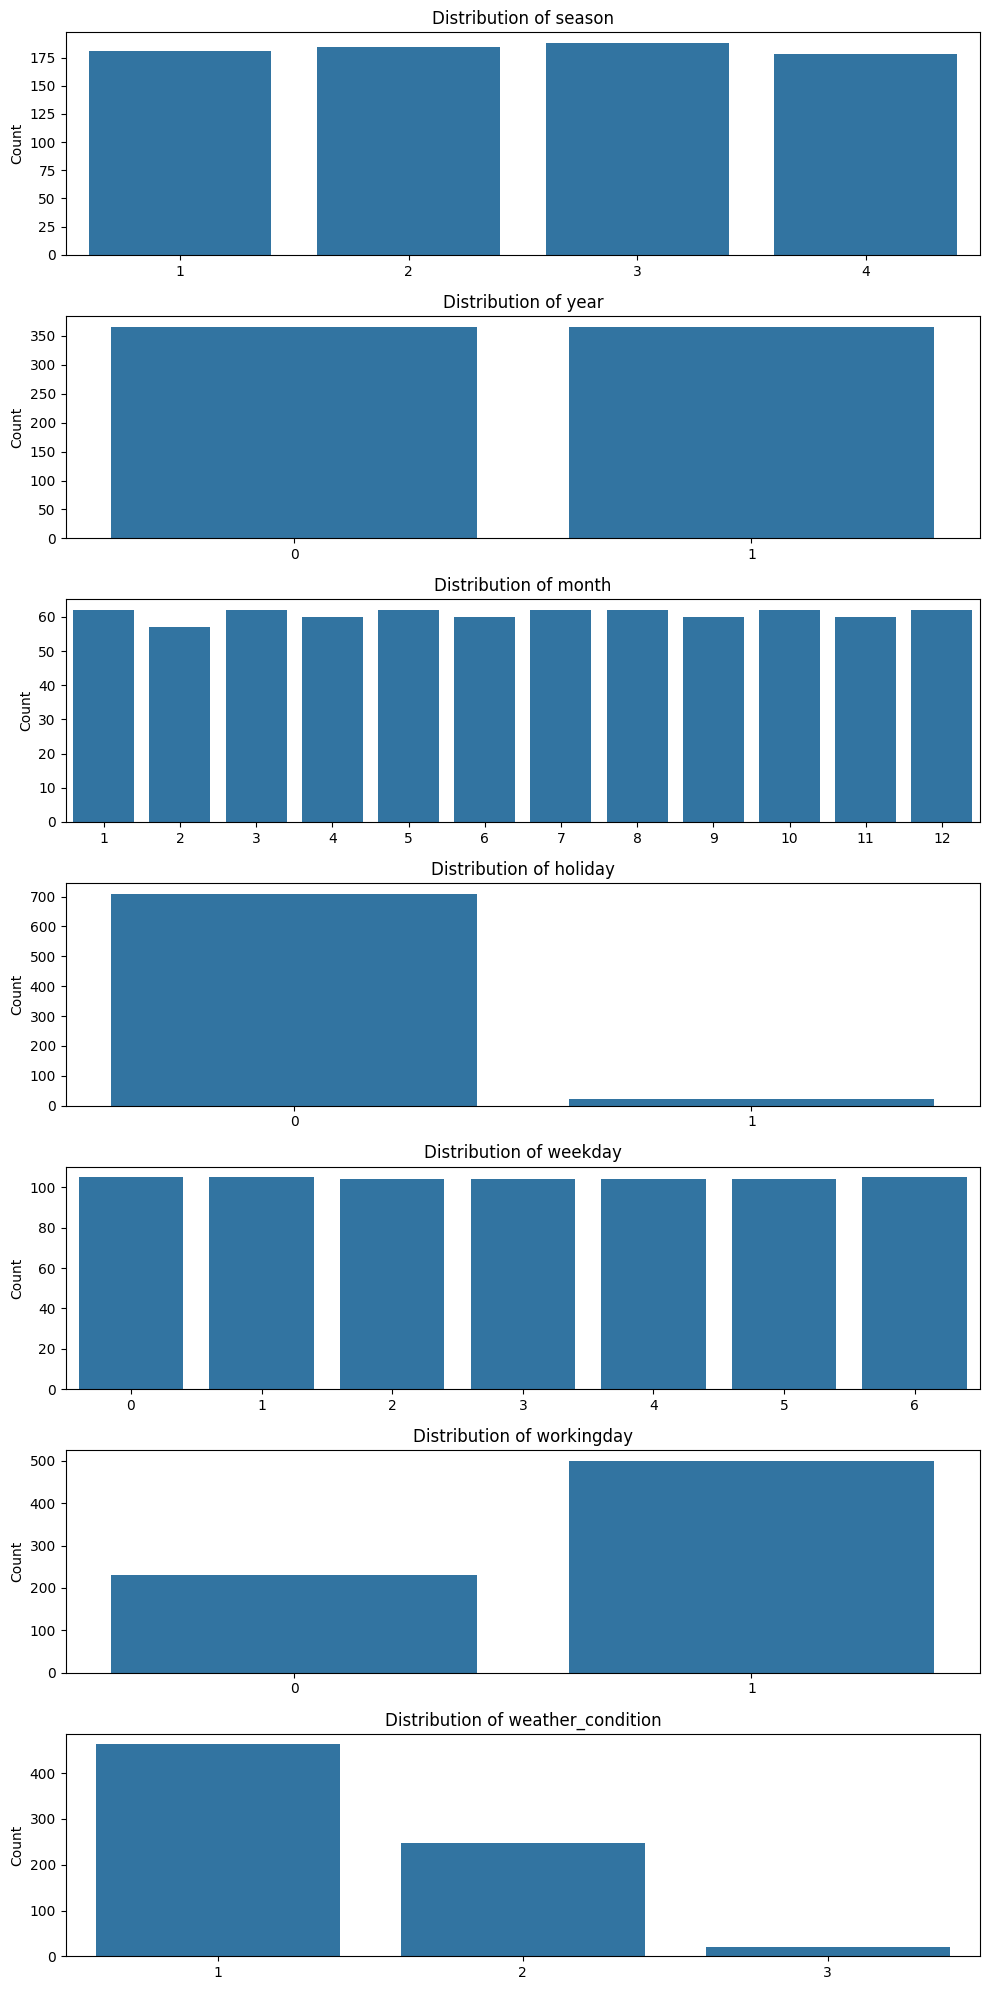

In [ ]:
# Categorical feature analysis using bar plots
categorical_cols = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_condition']
fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=1, figsize=(10, 20))
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=Bike_sharing_data, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

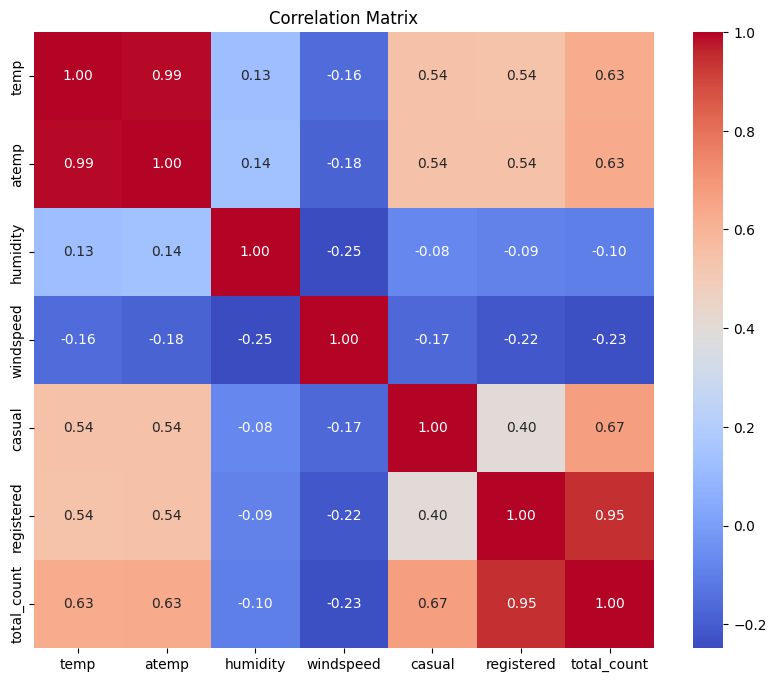

In [ ]:
# Visualize correlation between numeric variables using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(Bike_sharing_data[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

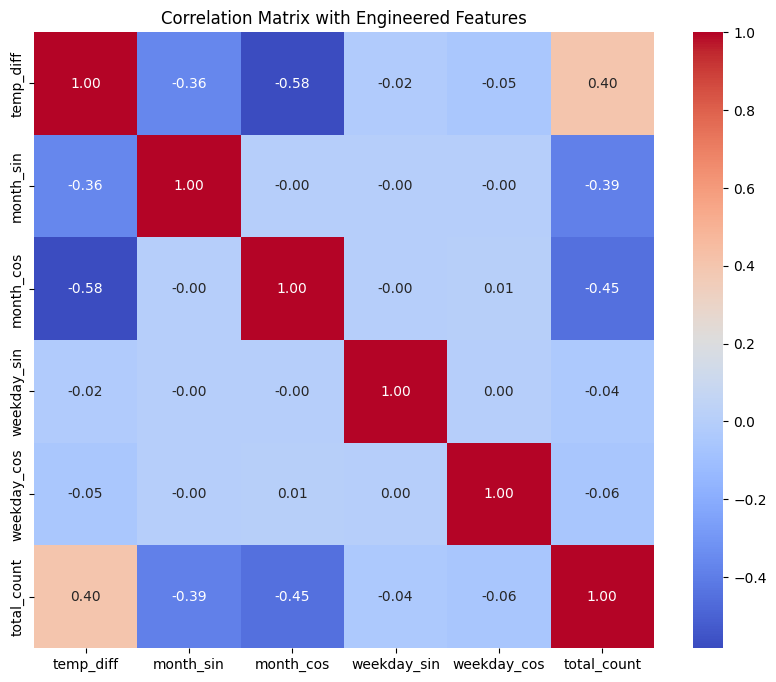

In [ ]:
# Feature engineering: Create new features to potentially improve model performance
Bike_sharing_data['day_of_month'] = Bike_sharing_data['datetime'].dt.day
Bike_sharing_data['week_of_year'] = Bike_sharing_data['datetime'].dt.isocalendar().week
Bike_sharing_data['temp_diff'] = Bike_sharing_data['temp'] -Bike_sharing_data['atemp']
Bike_sharing_data['month_sin'] = np.sin(2 * np.pi * Bike_sharing_data['month']/12)
Bike_sharing_data['month_cos'] = np.cos(2 * np.pi * Bike_sharing_data['month']/12)
Bike_sharing_data['weekday_sin'] = np.sin(2 * np.pi * Bike_sharing_data['weekday']/7)
Bike_sharing_data['weekday_cos'] = np.cos(2 * np.pi * Bike_sharing_data['weekday']/7)
new_numeric_cols = ['temp_diff', 'month_sin', 'month_cos', 'weekday_sin', 'weekday_cos', 'total_count']
plt.figure(figsize=(10, 8))
sns.heatmap(Bike_sharing_data[new_numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix with Engineered Features")
plt.show()

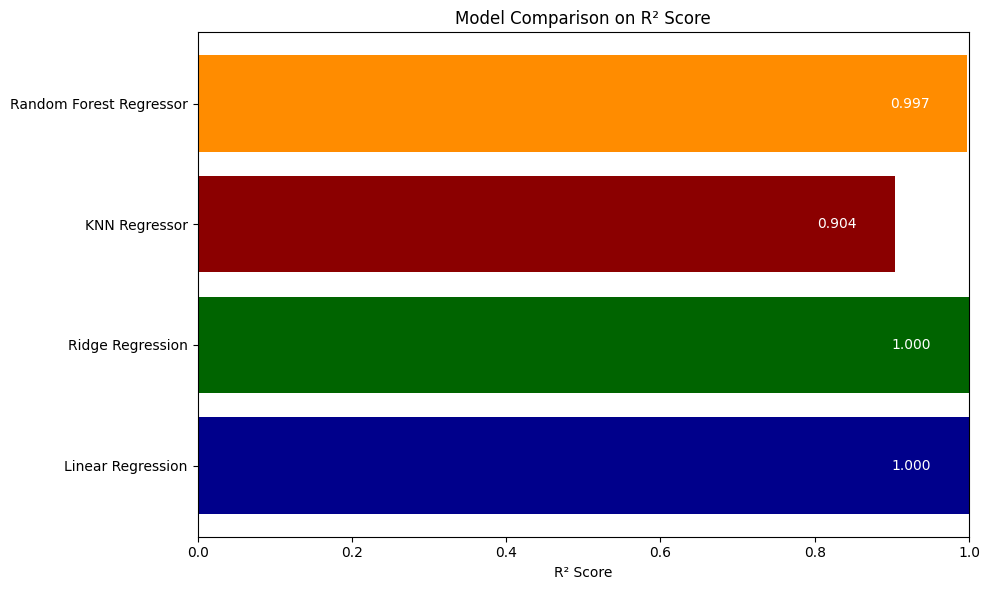

In [ ]:
# Your models and scores dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "KNN Regressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}
scores = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    scores[name] = model.score(X_test_scaled, y_test)

# Define colors for each bar
colors = ['darkblue', 'darkgreen', 'darkred', 'darkorange']

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(list(scores.keys()), list(scores.values()), color=colors)
plt.xlabel('R² Score')
plt.title('Model Comparison on R² Score')
plt.xlim(0, 1)

# Annotating each bar with its respective R² score
for bar, score in zip(bars, scores.values()):
    plt.text(bar.get_width() - 0.1, bar.get_y() + bar.get_height()/2, f'{score:.3f}',
             va='center', color='white')

plt.tight_layout()
plt.show()

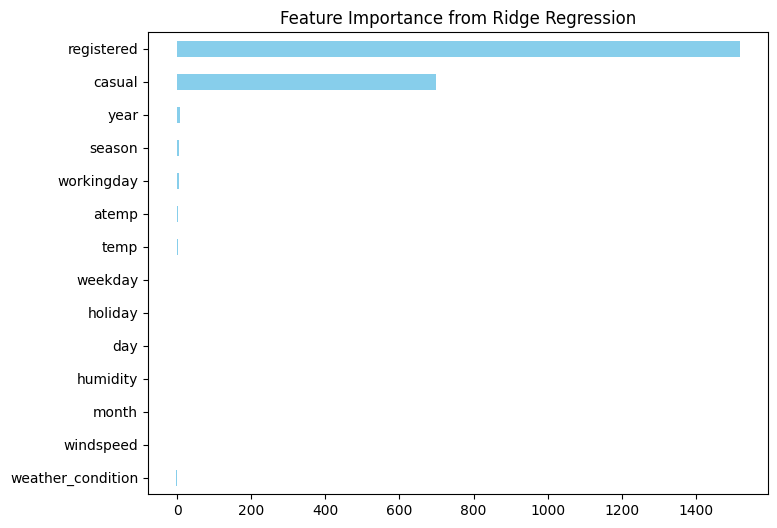

In [ ]:
# Display feature importance from Ridge Regression model
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)
y_pred = ridge_model.predict(X_test_scaled)
feature_importance = pd.Series(ridge_model.coef_, index=X_train.columns)
feature_importance = feature_importance.sort_values()
plt.figure(figsize=(8, 6))
feature_importance.plot(kind='barh', color='skyblue')
plt.title("Feature Importance from Ridge Regression")
plt.show()


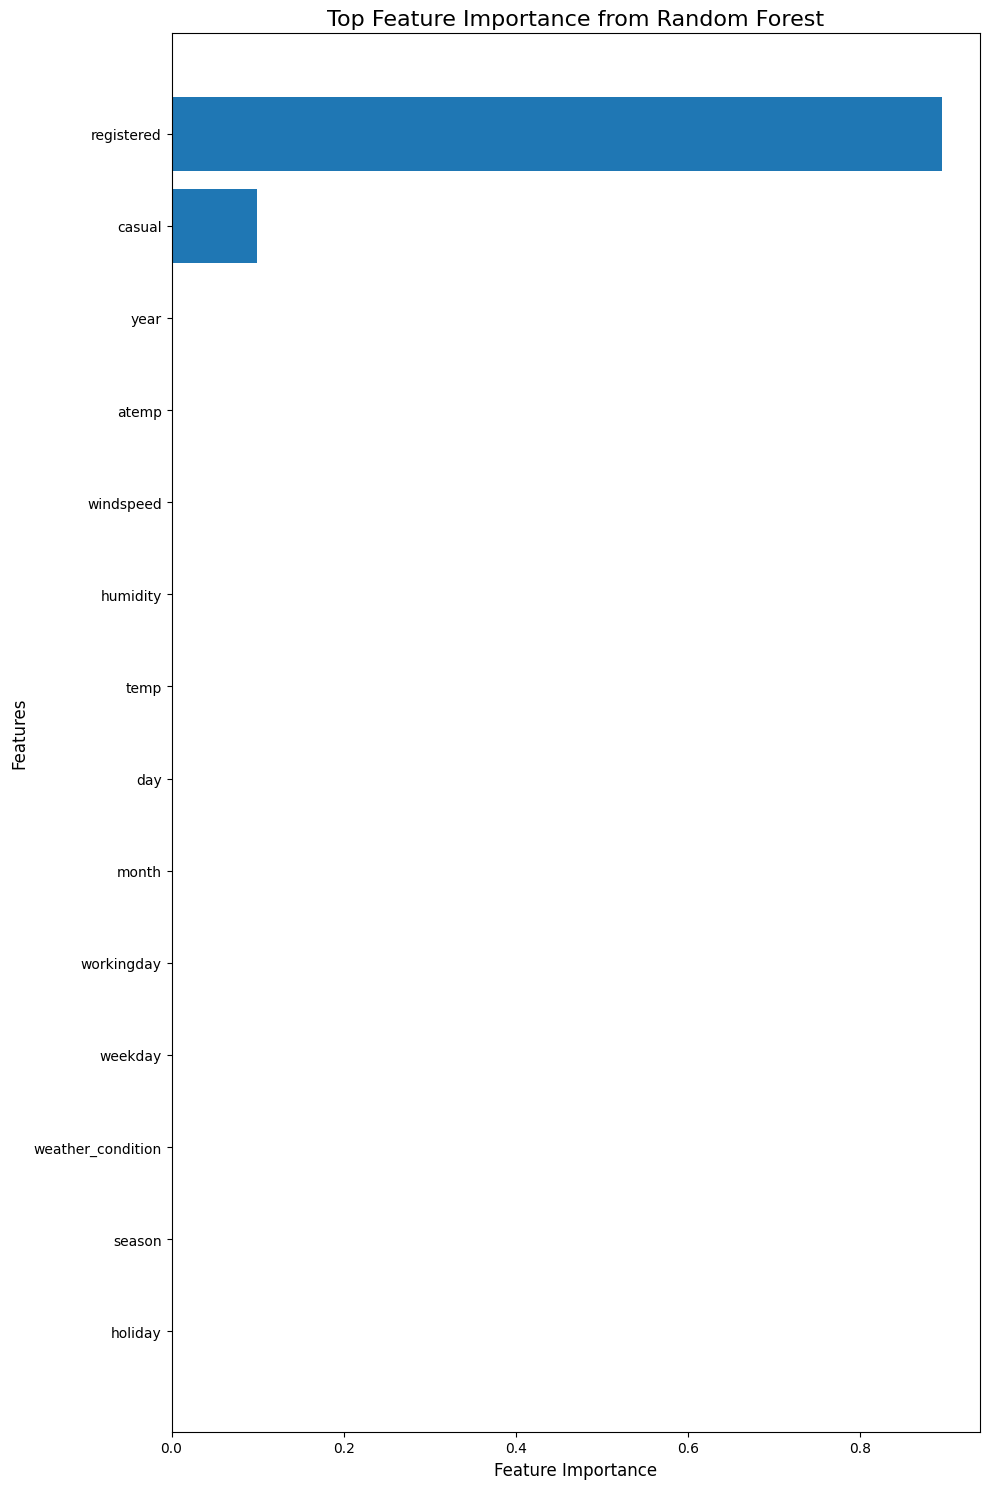

In [ ]:
# Choose how many top features to display for clarity
top_n = 20

# Feature importance visualization for Random Forest
feature_importances = rf_model.feature_importances_
# Adjusting for different scikit-learn versions
if hasattr(poly, 'get_feature_names_out'):  # For scikit-learn 1.0 and later
    features = poly.get_feature_names_out(input_features=X_train.columns)
else:  # For older versions of scikit-learn
    features = poly.get_feature_names(input_features=X_train.columns)

sorted_idx = np.argsort(feature_importances)[-top_n:]  # Only take the top n features for clarity

plt.figure(figsize=(10, 15))  # Increase figure size
plt.barh(np.array(features)[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Top Feature Importance from Random Forest", fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()  # Adjust layout to make room for label
plt.show()

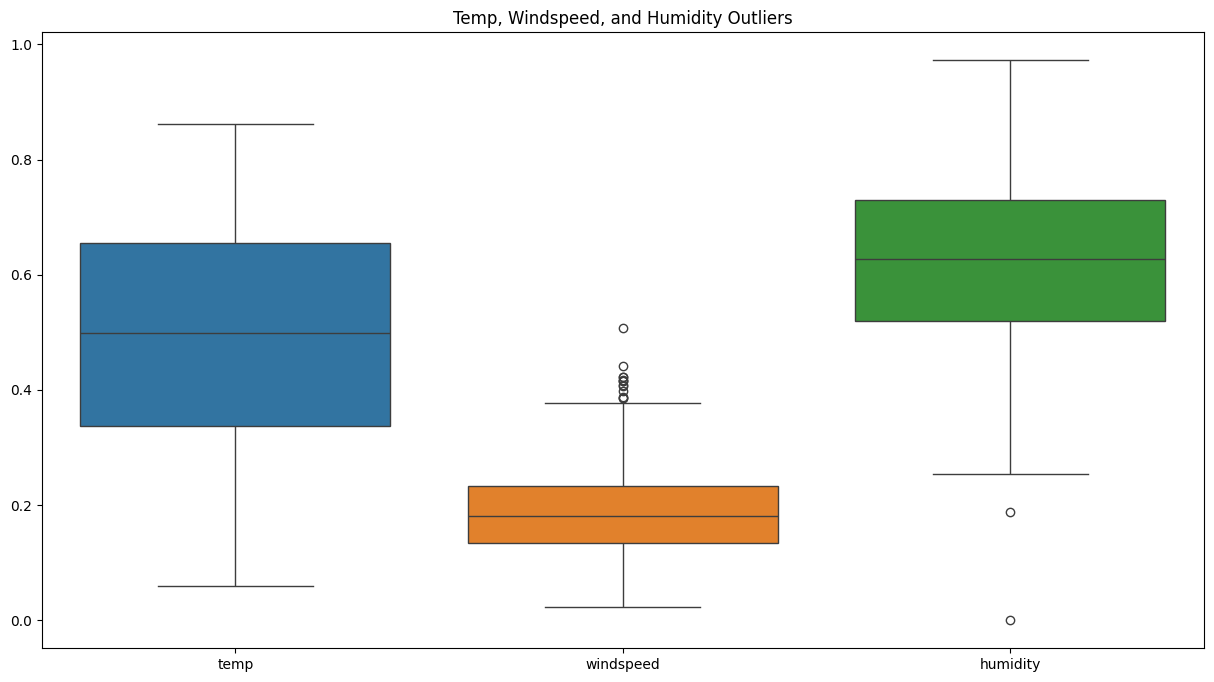

In [ ]:
# Temp, windspeed, and humidity outliers
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(data=Bike_sharing_data[['temp', 'windspeed', 'humidity']])
ax.set_title('Temp, Windspeed, and Humidity Outliers')
plt.show()


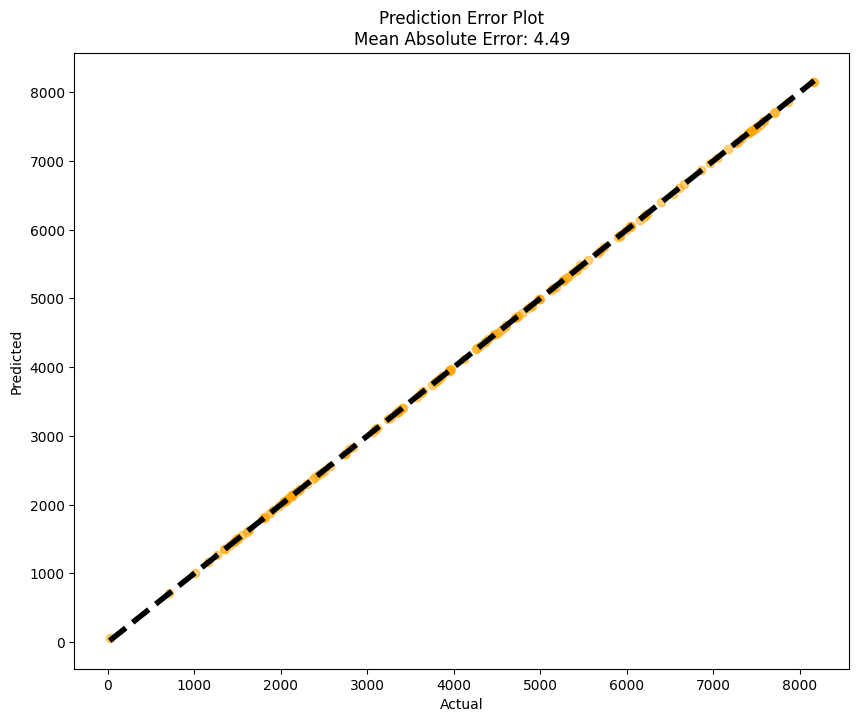

In [ ]:
# Prediction error plot and learning curve
mae = mean_absolute_error(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Prediction Error Plot\nMean Absolute Error: {mae:.2f}')
plt.show()

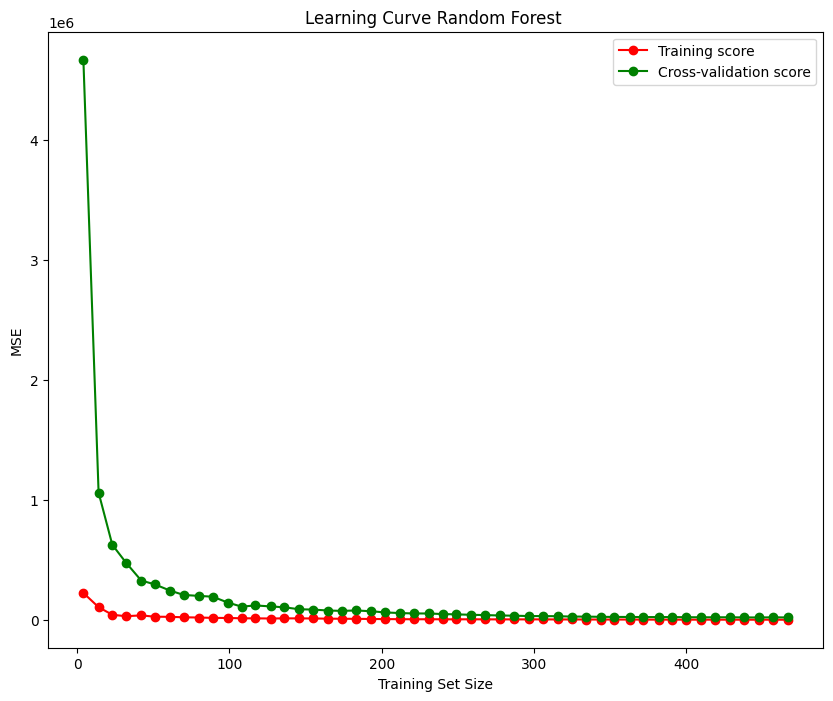

In [ ]:
# Learning curve for Random Forest model
train_sizes, train_scores, validation_scores = learning_curve(
    RandomForestRegressor(n_estimators=100, random_state=42),
    X_train_scaled,
    y_train,
    train_sizes=np.linspace(0.01, 1.0, 50),
    cv=5,
    scoring='neg_mean_squared_error'
)
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)
plt.figure(figsize=(10, 8))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve Random Forest ")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.show()

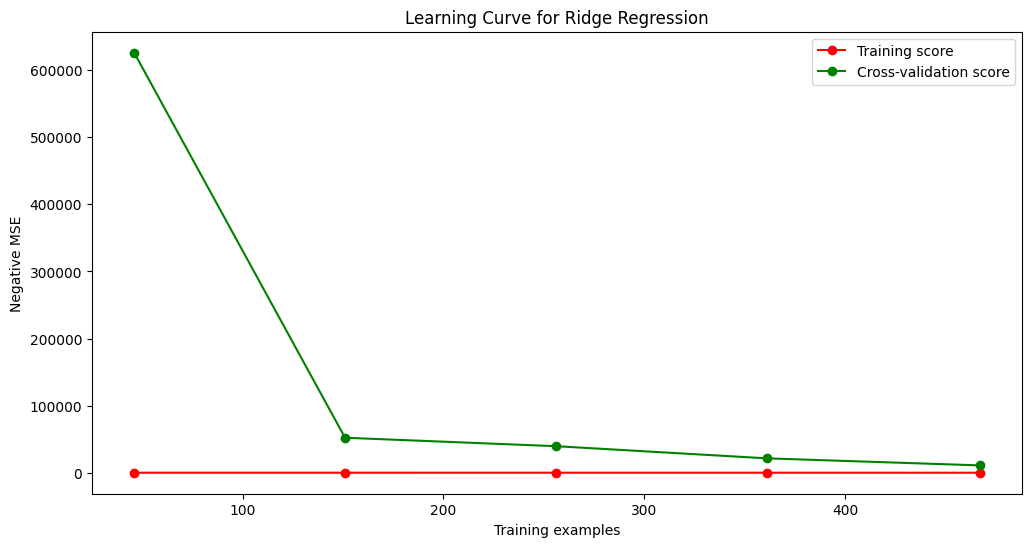

In [ ]:
# Learning curve
train_sizes, train_scores, test_scores = learning_curve(best_ridge, X_train_poly, y_train, cv=5,
                                                        scoring='neg_mean_squared_error',
                                                        train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Negative MSE")
plt.title("Learning Curve for Ridge Regression")
plt.legend(loc="best")
plt.show()

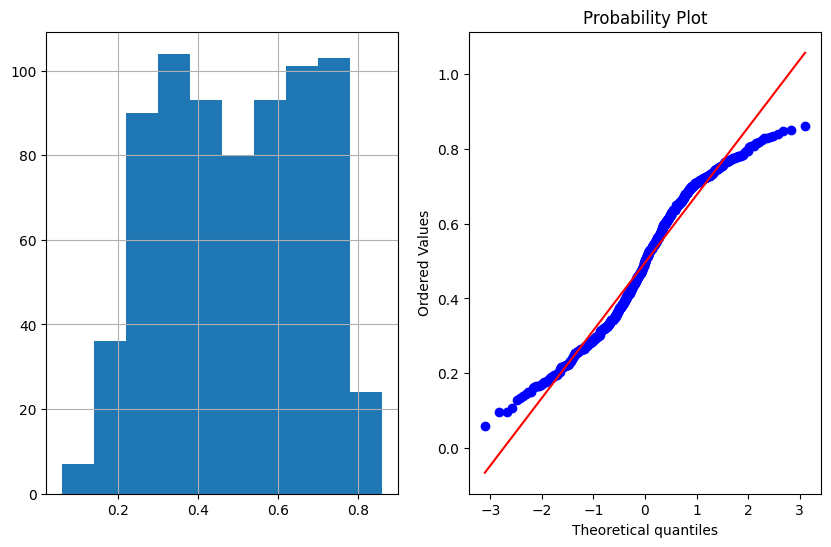

In [ ]:
# Distribution and Probability plots for 'temp'
def plot_curve(feature):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    Bike_sharing_data[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(Bike_sharing_data[feature], dist='norm', plot=pylab)
    plt.show()

plot_curve('temp')